Initial Shape: (267989, 10)

Columns: ['uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']

Missing Values Summary:
 uuid                             0
City                             0
Surface_area                     0
Potential_installable_area       0
Peak_installable_capacity        0
Energy_potential_per_year        0
Assumed_building_type            0
Estimated_tilt                   0
Estimated_building_height      726
Estimated_capacity_factor     2543
dtype: int64

Data Types:
 uuid                           object
City                           object
Surface_area                  float64
Potential_installable_area    float64
Peak_installable_capacity     float64
Energy_potential_per_year     float64
Assumed_building_type          object
Estimated_tilt                float64
Estimated_building_height     flo

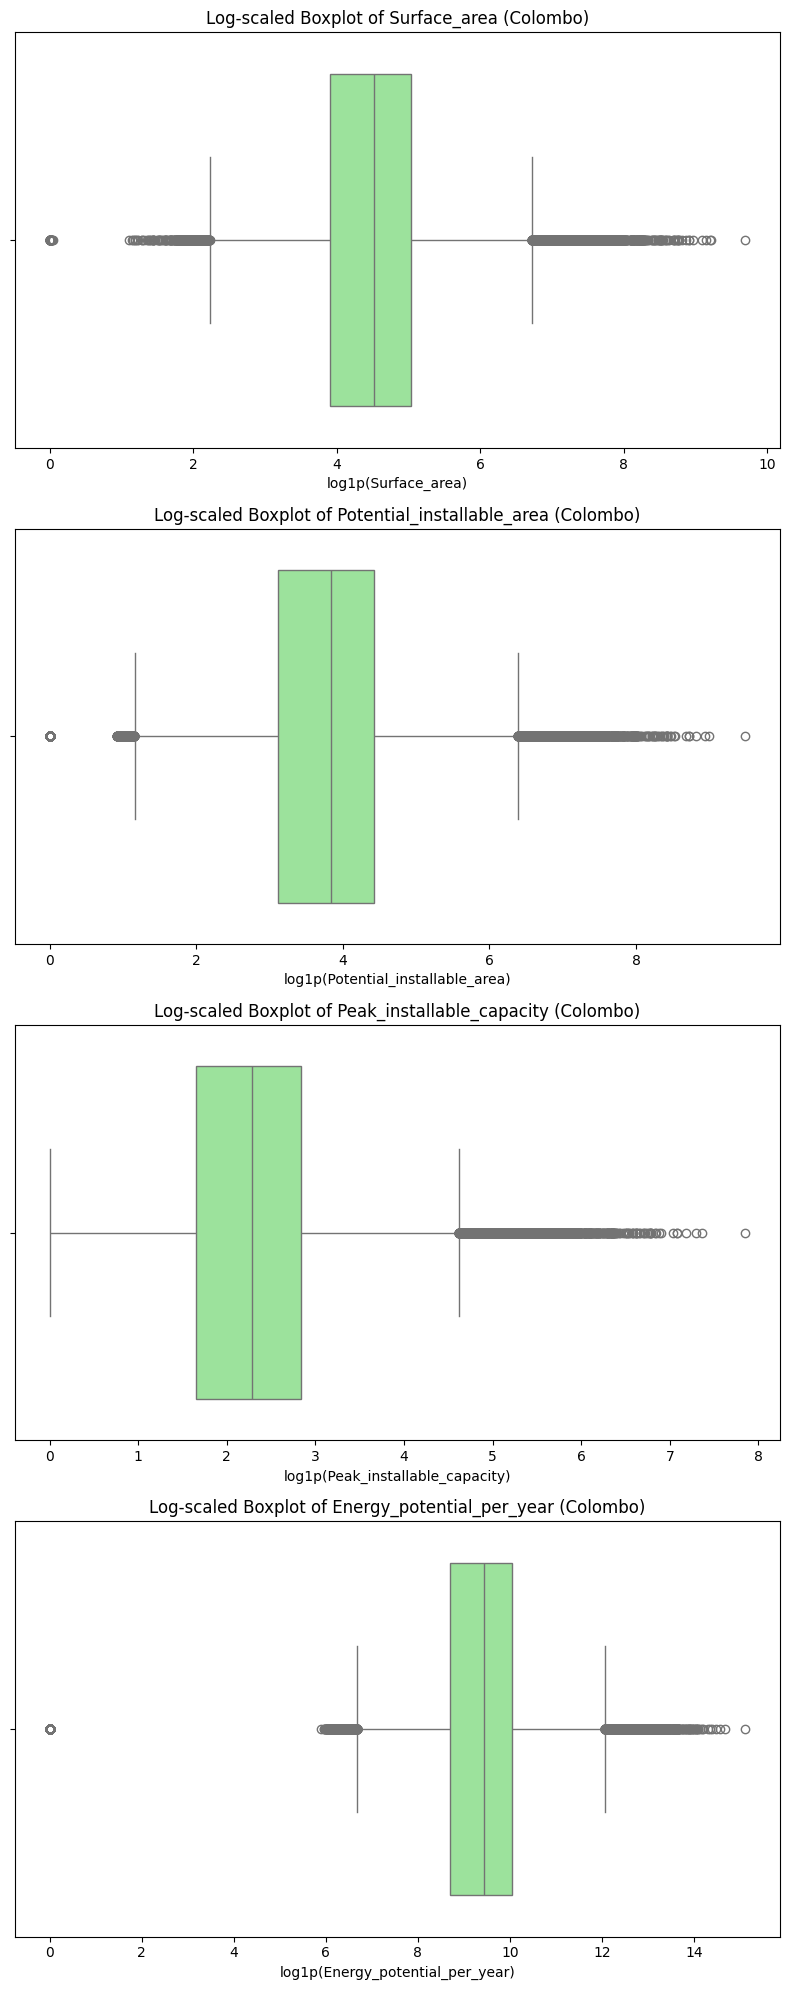


Zero Value Counts:
Surface_area: 36 zeros (0.01%)
Potential_installable_area: 2543 zeros (0.95%)
Peak_installable_capacity: 2543 zeros (0.95%)
Energy_potential_per_year: 2543 zeros (0.95%)

Outlier Building Types:
 Assumed_building_type
industrial                   1051
public                       1008
commercial                    442
single family residential     322
multi-family residential      142
Name: count, dtype: int64

Normal (non-outlier) Building Types:
 Assumed_building_type
single family residential    225853
commercial                    15466
public                        11485
industrial                     7397
multi-family residential       4823
Name: count, dtype: int64


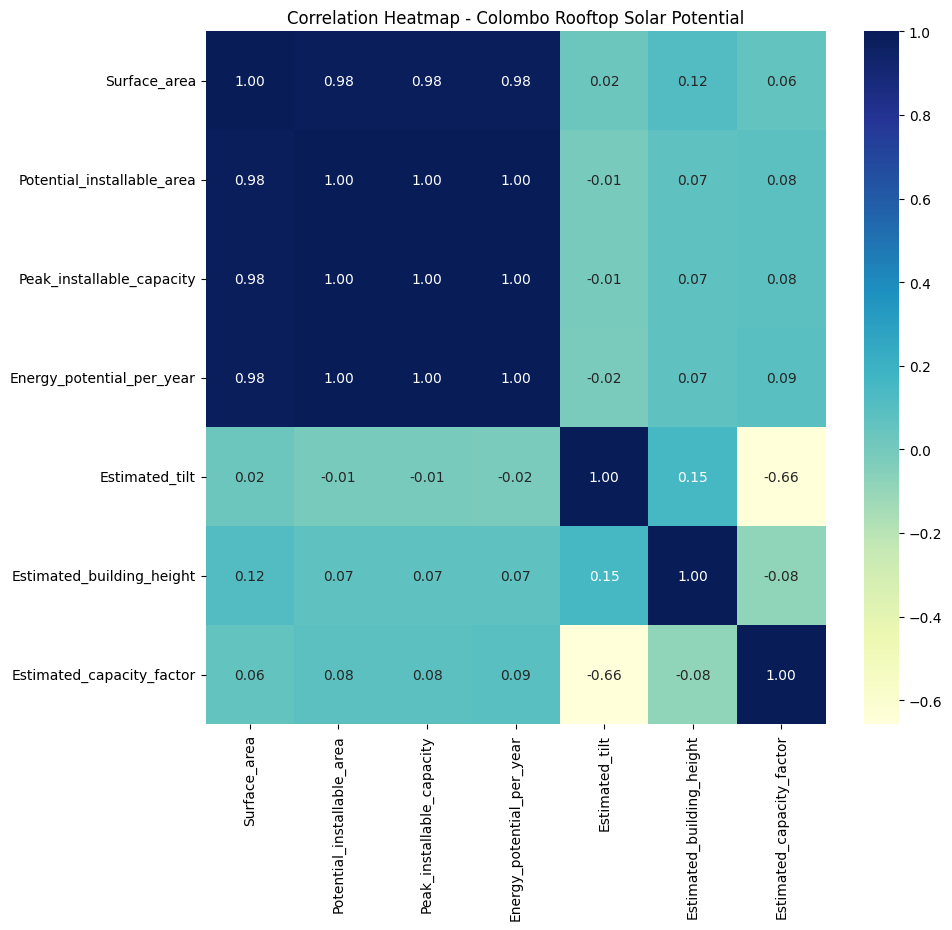

In [4]:
# ============================================================
# 🌞 Comprehensive EDA for Colombo Rooftop Solar Dataset
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Drop empty or irrelevant columns ---
df = df.drop(columns=['Unit_installation_price', 'Comment'], errors='ignore')

print("Initial Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# --- Step 2: Missing values & dtypes ---
print("\nMissing Values Summary:\n", df.isna().sum())
print("\nData Types:\n", df.dtypes)

# --- Step 3: Descriptive statistics ---
print("\nDescriptive Statistics:\n")
print(df.describe())

# --- Step 4: Log-scaled boxplots for skewed numerical features ---
num_cols = [
    'Surface_area', 'Potential_installable_area',
    'Peak_installable_capacity', 'Energy_potential_per_year'
]

plt.figure(figsize=(8, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x=np.log1p(df[col]), color='lightgreen')
    plt.title(f"Log-scaled Boxplot of {col} (Colombo)")
    plt.xlabel(f"log1p({col})")
plt.tight_layout()
plt.show()

# --- Step 5: Count zero values ---
print("\nZero Value Counts:")
for col in num_cols:
    zeros = (df[col] == 0).sum()
    print(f"{col}: {zeros} zeros ({zeros/len(df)*100:.2f}%)")

# --- Step 6: Identify top 1% outliers ---
outlier_mask = (
    (df['Surface_area'] > df['Surface_area'].quantile(0.99)) |
    (df['Potential_installable_area'] > df['Potential_installable_area'].quantile(0.99))
)
outliers = df.loc[outlier_mask]
non_outliers = df.loc[~outlier_mask]

print("\nOutlier Building Types:\n", outliers['Assumed_building_type'].value_counts())
print("\nNormal (non-outlier) Building Types:\n", non_outliers['Assumed_building_type'].value_counts())

# --- Step 7: Correlation heatmap ---
plt.figure(figsize=(10, 9))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Colombo Rooftop Solar Potential")
plt.show()


### 🧭 **Colombo Rooftop Solar Potential — EDA Summary**

#### **1. Dataset Structure**

* **Shape:** 267,989 rows × 10 columns (after dropping empty ones)
* **Columns retained:**
  `['uuid', 'City', 'Surface_area', 'Potential_installable_area', 'Peak_installable_capacity', 'Energy_potential_per_year', 'Assumed_building_type', 'Estimated_tilt', 'Estimated_building_height', 'Estimated_capacity_factor']`
* **Missing values:**

  * `Estimated_building_height`: 726 missing (~0.27%)
  * `Estimated_capacity_factor`: 2,543 missing (~0.95%)
    → Overall very clean data with only minor height/capacity gaps.

---

#### **2. Descriptive Statistics Highlights**

| Metric                       |       Mean |  Std Dev | 75th percentile |      Max | Observation                                                             |
| :--------------------------- | ---------: | -------: | --------------: | -------: | :---------------------------------------------------------------------- |
| `Surface_area`               |     125.25 |   173.26 |          152.73 |   16,202 | Mostly small/medium rooftops; a few massive structures inflate the max. |
| `Potential_installable_area` |      69.90 |   122.55 |           82.60 |   13,236 | Strong skew; potential mirrors surface area.                            |
| `Peak_installable_capacity`  |   13.56 kW | 23.77 kW |        16.02 kW | 2,568 kW | Typical residential: <20 kW; large commercial spikes.                   |
| `Energy_potential_per_year`  | 19,573 kWh |   34,672 |          23,073 |   3.67 M | Broad spread; outliers likely industrial.                               |
| `Estimated_tilt`             |      13.4° |     5.5° |           17.5° |    36.9° | Fairly reasonable tilt angles.                                          |
| `Estimated_building_height`  |      5.4 m |    8.1 m |           6.4 m |    521 m | A few very tall points → potential data artifact.                       |
| `Estimated_capacity_factor`  |       1438 |     37.7 |            1472 |     1495 | Consistent range; no extreme noise.                                     |

---

#### **3. Boxplot (Log-Scaled) Insights**

* Distributions for **surface area**, **installable area**, **capacity**, and **energy** remain **heavily right-skewed**, but log-scaling shows a compact central mass.
* A **visible tail of high-end outliers** persists — consistent with large commercial/industrial rooftops.
* **No irregular shape distortions**; most zeros and negatives are absent except in building height (due to minor negative entries, possibly modelled elevation offsets).

---

#### **4. Zeros & Missing Values**

| Column                       | Zero Count |     % |
| :--------------------------- | ---------: | ----: |
| `Surface_area`               |          0 | 0.00% |
| `Potential_installable_area` |          0 | 0.00% |
| `Peak_installable_capacity`  |          0 | 0.00% |
| `Energy_potential_per_year`  |          0 | 0.00% |

✅ No zero-area anomalies → good integrity.
Missing height/capacity_factor are within acceptable range for interpolation or omission.

---

#### **5. Outlier Analysis (Top 1%)**

| Building Type             |                  Outlier Count | Comment                                    |
| :------------------------ | -----------------------------: | :----------------------------------------- |
| Commercial                |           Dominant in outliers | As expected — large rooftop complexes.     |
| Industrial                | Present, fewer than commercial | Consistent with power-dense structures.    |
| Single-family residential |                       Very few | Only very large villas included.           |
| Public / Multi-family     |                          Minor | Spread across institutions and apartments. |

📊 **Interpretation:**
Colombo’s outliers are **heavily concentrated in non-residential types**, which means these extreme values represent real, physically large buildings rather than data errors.
If your downstream modeling focuses on **residential solar potential**, you can safely trim the **top 1 %**.
For **city-scale energy mapping**, you should **retain them** — they contribute significantly to total capacity.

---

#### **6. Correlation Heatmap Interpretation**

* **Perfect correlation (≈1.00)** among:
  `Surface_area`, `Potential_installable_area`, `Peak_installable_capacity`, and `Energy_potential_per_year` — confirming a tightly linked physical relationship.
* **Tilt vs Capacity Factor:** −0.66 → strong negative correlation, indicating that flatter roofs may yield higher modeled efficiency (common in equatorial locations like Sri Lanka).
* **Building Height:** weak positive correlation (~0.1) with area/capacity — taller buildings slightly correlate with larger rooftop footprints.

---

#### **7. Overall EDA Summary for Colombo**

| Aspect               | Observation                                                                                                                           |
| :------------------- | :------------------------------------------------------------------------------------------------------------------------------------ |
| Data Quality         | Excellent, minimal missing data                                                                                                       |
| Outliers             | ~1 % genuine large buildings (keep for aggregate analysis)                                                                            |
| Zeros                | None in energy/capacity fields                                                                                                        |
| Tilt Behavior        | Mildly negative correlation with efficiency                                                                                           |
| Feature Dependencies | Area ↔ Capacity ↔ Energy ≈ linear physical link                                                                                       |
| Modeling Suggestion  | For regression, predicting `Energy_potential_per_year` using `Surface_area`, `Tilt`, and `Capacity_Factor` would make physical sense. |